# Clustering Algorithms
Clustering is the task of grouping together a set of objects in a way that objects in the same cluster are more similar to each other than to objects in other clusters. Similarity is a metric that reflects the strength of relationship between two data objects. Clustering is mainly used for exploratory data mining. It has manifold usage in many fields such as machine learning, pattern recognition, image analysis, information retrieval, bio-informatics, data compression, and computer graphics.


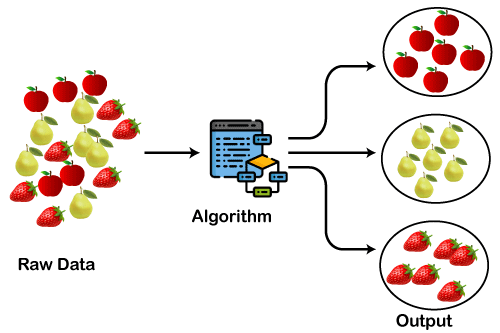

There are many models for clustering out there. Despite its simplicity, the K-means is vastly used for clustering in many data science applications, especially useful if you need to quickly discover insights from unlabeled data. In this notebook, we see how to use k-Means for customer segmentation.
After which we will use DBScan algorithm to also identify segments within the same dataset

In [1]:
from sklearn.preprocessing import StandardScaler

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

import os
import warnings

warnings.filterwarnings('ignore')

In [2]:
# Import local dataset
from google.colab import files
uploaded = files.upload()

Saving E_shop_Customers_withoutTarget.csv to E_shop_Customers_withoutTarget.csv


In [3]:
%load_ext google.colab.data_table

In [4]:
# Importing dataset and examining it
dataset = pd.read_csv("E_shop_Customers_withoutTarget.csv")
pd.set_option('display.max_columns', None) # Will ensure that all columns are displayed
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
#rename the spending score to score
dataset.rename(index=str, columns={'Annual Income (k$)': 'Income',
                              'Spending Score (1-100)': 'Score'}, inplace=True)
dataset.head()

,CustomerID,Gender,Age,Income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# Drop gender and CustomerID
X = dataset.drop(['CustomerID', 'Gender'], axis=1)

In [ ]:
#Pandas profiling
#! pip install pandas-profiling
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

In [13]:
import pandas_profiling as pandas_pf
pandas_pf.ProfileReport(X)

Summarize dataset:   0%|          | 0/17 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# PairPlot to display the respective combinations

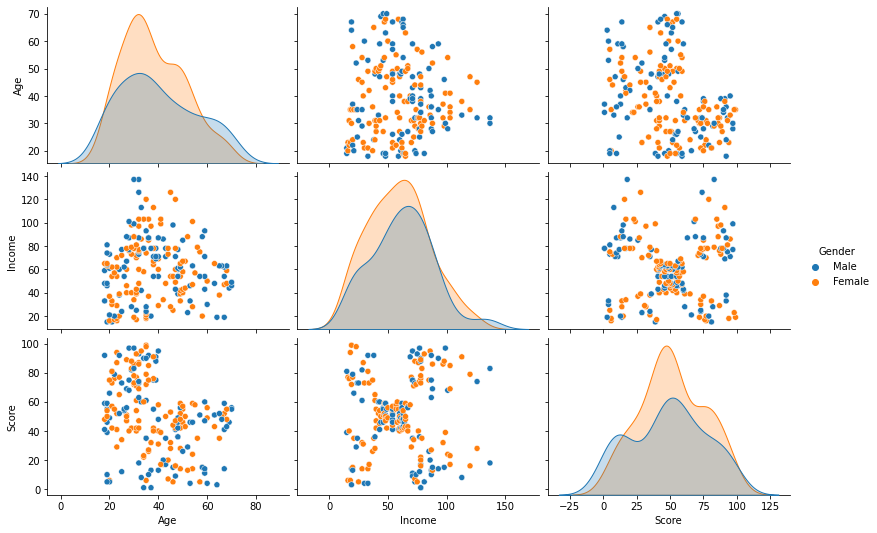

In [8]:
# Let's see our data in a detailed way with pairplot
sns.pairplot(dataset.drop('CustomerID', axis=1), hue='Gender', aspect=1.5)
plt.show()

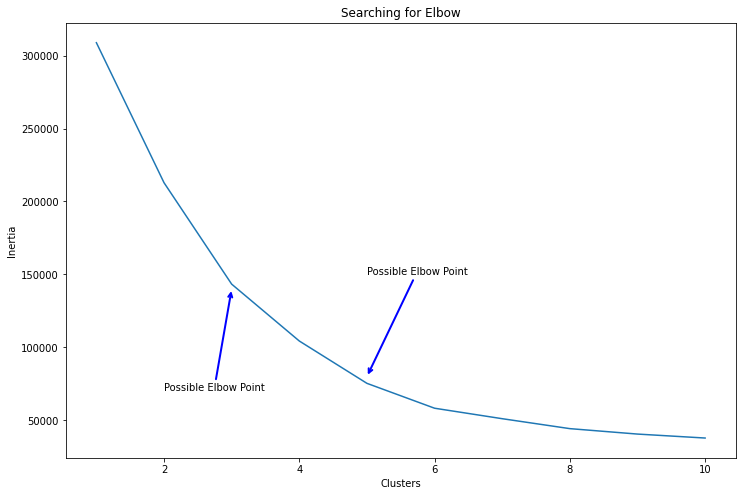

In [10]:
#use the elbow plot to determine the optimal number of clusters
from sklearn.cluster import KMeans

clusters = []

for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(X)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

# Annotate arrow
ax.annotate('Possible Elbow Point', xy=(3, 140000), xytext=(2, 70000), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))
#Questionable??
ax.annotate('Possible Elbow Point', xy=(5, 80000), xytext=(5, 150000), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

plt.show()

# Create scatter plots to see the variable combinations or you can also use pandas profiling for this

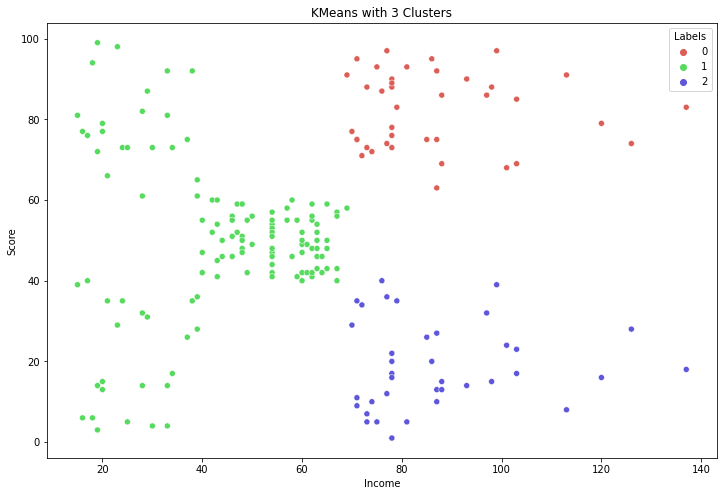

In [14]:
# 3 cluster
km3 = KMeans(n_clusters=3).fit(X)

X['Labels'] = km3.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(X['Income'], X['Score'], hue=X['Labels'], 
                palette=sns.color_palette('hls', 3))
plt.title('KMeans with 3 Clusters')
plt.show()

## Plot the same plot with 5 clusters and 2 cluster and see if you notice any differences

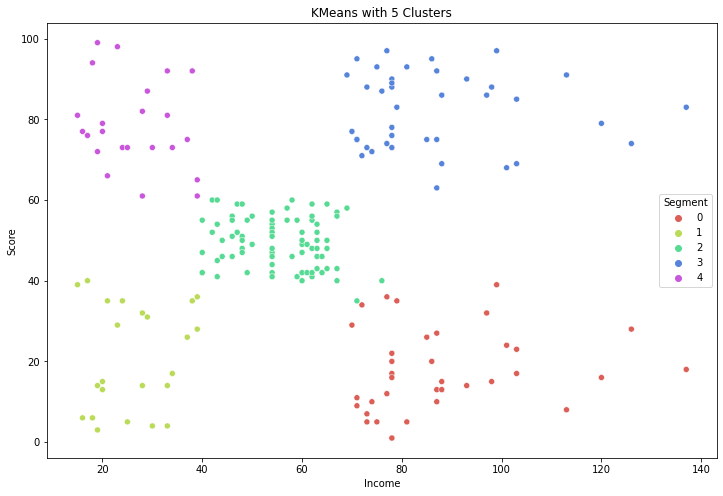

In [18]:
# Let's see with 5 Clusters
km5 = KMeans(n_clusters=5).fit(X)

X['Segment'] = km5.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(X['Income'], X['Score'], hue=X['Segment'], 
                palette=sns.color_palette('hls', 5))
plt.title('KMeans with 5 Clusters')
plt.show()

We could choose 5 or stick with 3 - it depends on the business problem you are trying to solve and the leverage you have.

Details analysis of our 5 clusters as follows: 

Label 0 is low income and low spending
Label 1 is high income and high spending
Label 2 is mid income and mid spending
Label 3 is high income and low spending
Label 4 is low income and high spending
Also let's see them more clearly with swarmplot

In [19]:
#Visualise the dataset
X

,Age,Income,Score,Labels,Segment
0,19,15,39,0,1
1,21,15,81,3,4
2,20,16,6,0,1
3,23,16,77,3,4
4,31,17,40,0,1
...,...,...,...,...,...
195,35,120,79,1,3
196,45,126,28,4,0
197,32,126,74,1,3
198,32,137,18,4,0


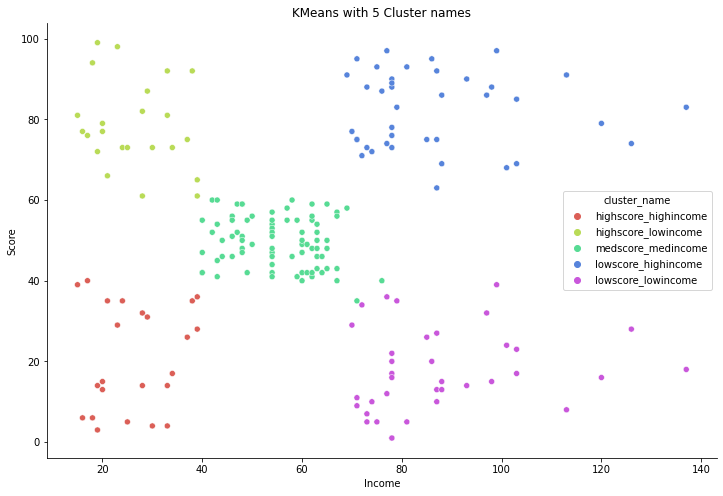

In [20]:
mynames = {"0": "lowscore_lowincome", "1": "highscore_highincome", "2": "medscore_medincome", "3": "lowscore_highincome", 
           "4": "highscore_lowincome"}
X["cluster_name"] = [mynames[str(i)] for i in X.Segment]

# Replot the graph with cluster names
plt.figure(figsize=(12, 8))
sns.scatterplot(X['Income'], X['Score'], hue=X['cluster_name'], 
                palette=sns.color_palette('hls', 5))
plt.title('KMeans with 5 Cluster names')
sns.despine()
plt.show()

In [ ]:
# Assign the clusters to respective dataframes for detailed analysis
df1=X[X.Segment==0]
df2=X[X.Segment==1]
df3=X[X.Segment==2]
df4=X[X.Segment==3]
df5=X[X.Segment==4]

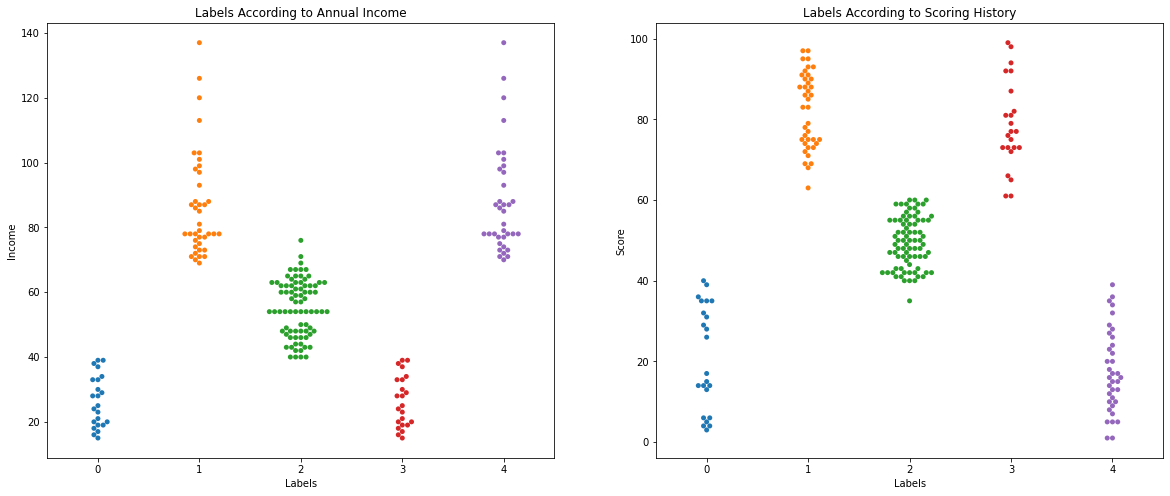

In [22]:
#Visualise with Swarmplot
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(121)
sns.swarmplot(x='Labels', y='Income', data=X, ax=ax)
ax.set_title('Labels According to Annual Income')

ax = fig.add_subplot(122)
sns.swarmplot(x='Labels', y='Score', data=X, ax=ax)
ax.set_title('Labels According to Scoring History')

plt.show()

# Density Based Clustering DBSCAN

In [25]:
X

,Age,Income,Score,Labels,Segment,cluster_name
0,19,15,39,0,1,highscore_highincome
1,21,15,81,3,4,highscore_lowincome
2,20,16,6,0,1,highscore_highincome
3,23,16,77,3,4,highscore_lowincome
4,31,17,40,0,1,highscore_highincome
...,...,...,...,...,...,...
195,35,120,79,1,3,lowscore_highincome
196,45,126,28,4,0,lowscore_lowincome
197,32,126,74,1,3,lowscore_highincome
198,32,137,18,4,0,lowscore_lowincome


In [29]:
X2 = X.drop(['Segment','cluster_name'], axis=1)
X2

,Age,Income,Score,Labels
0,19,15,39,0
1,21,15,81,3
2,20,16,6,0
3,23,16,77,3
4,31,17,40,0
...,...,...,...,...
195,35,120,79,1
196,45,126,28,4
197,32,126,74,1
198,32,137,18,4


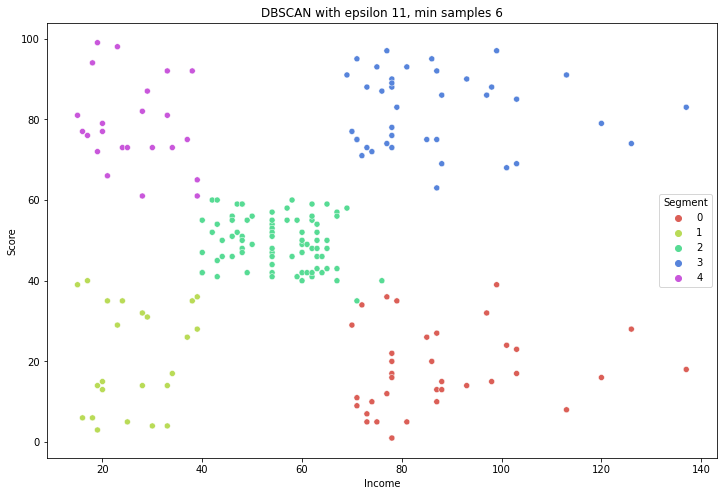

In [30]:
from sklearn.cluster import DBSCAN 

db = DBSCAN(eps=11, min_samples=6).fit(X2)

X2['Segment'] = db.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(X['Income'], X['Score'], hue=X['Segment'], 
                palette=sns.color_palette('hls', np.unique(db.labels_).shape[0]))
plt.title('DBSCAN with epsilon 11, min samples 6')
plt.show()

# Hierarchical clustering

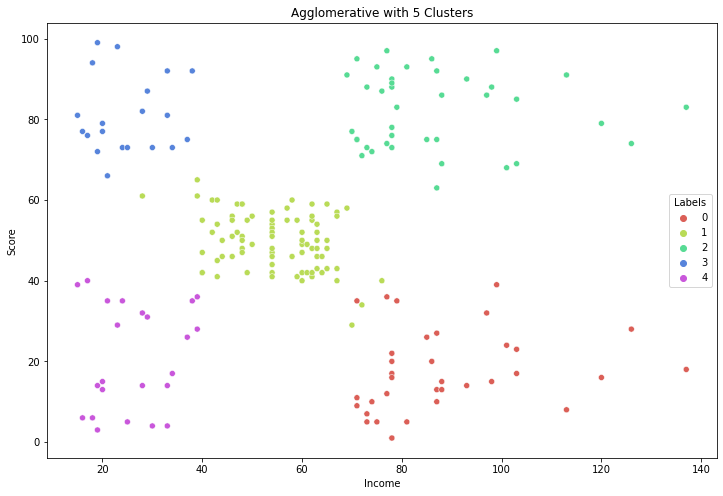

In [32]:
from sklearn.cluster import AgglomerativeClustering 

agglom = AgglomerativeClustering(n_clusters=5, linkage='average').fit(X2)

X2['Labels'] = agglom.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(X2['Income'], X2['Score'], hue=X2['Labels'], 
                palette=sns.color_palette('hls', 5))
plt.title('Agglomerative with 5 Clusters')
plt.show()

In [34]:
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix

dist = distance_matrix(X2, X2)
print(dist)

[[  0.          42.07136794  33.03028913 ... 117.12813496 124.53915047
  130.17296186]
 [ 42.07136794   0.          75.02666193 ... 111.77208954 137.7824372
  122.35603786]
 [ 33.03028913  75.02666193   0.         ... 129.89226305 122.24974438
  143.78456106]
 ...
 [117.12813496 111.77208954 129.89226305 ...   0.          57.10516614
   14.35270009]
 [124.53915047 137.7824372  122.24974438 ...  57.10516614   0.
   65.06150936]
 [130.17296186 122.35603786 143.78456106 ...  14.35270009  65.06150936
    0.        ]]


In [35]:
Z = hierarchy.linkage(dist, 'complete')

In [1]:
plt.figure(figsize=(18, 50))
dendro = hierarchy.dendrogram(Z, leaf_rotation=90, leaf_font_size=12, orientation='right')

NameError: ignored